In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D
import itertools


from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# 1.0
wt_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/WT', low_mem=True)
wt_1.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [52]:
# noelec = lmp.LMP(md_dir='/home/adria/perdiux/EpsVsLamb/EPSINF', low_mem=True)
# noelec.rg()
nohydr = lmp.LMP(md_dir='/home/adria/perdiux/EpsVsLamb/L0', low_mem=True)
nohydr.rg()
noelec = lmp.LMP(md_dir='/home/adria/perdiux/EpsVsLamb/EPSINF', low_mem=True)
noelec.rg()
eps60 = lmp.LMP(md_dir='/home/adria/perdiux/EpsVsLamb/EPS60', low_mem=True)
eps60.rg()
eps40 = lmp.LMP(md_dir='/home/adria/perdiux/EpsVsLamb/EPS40', low_mem=True)
eps40.rg()
eps20 = lmp.LMP(md_dir='/home/adria/perdiux/EpsVsLamb/EPS20', low_mem=True)
eps20.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Run Completed at 49.76% for CPEB4_alpha. Ran 497570000 steps for a total of 49758 frames 
> Run Completed at 60.15% for CPEB4_alpha. Ran 601480000 steps for a total of 60149 frames 
> Run Completed at 57.19% for CPEB4_alpha. Ran 571920000 steps for a total of 57193 frames 
> Run Completed at 55.34% for CPEB4_alpha. Ran 553410000 steps for a total of 55342 frames 


(array([], dtype=float64), array([], dtype=float64))

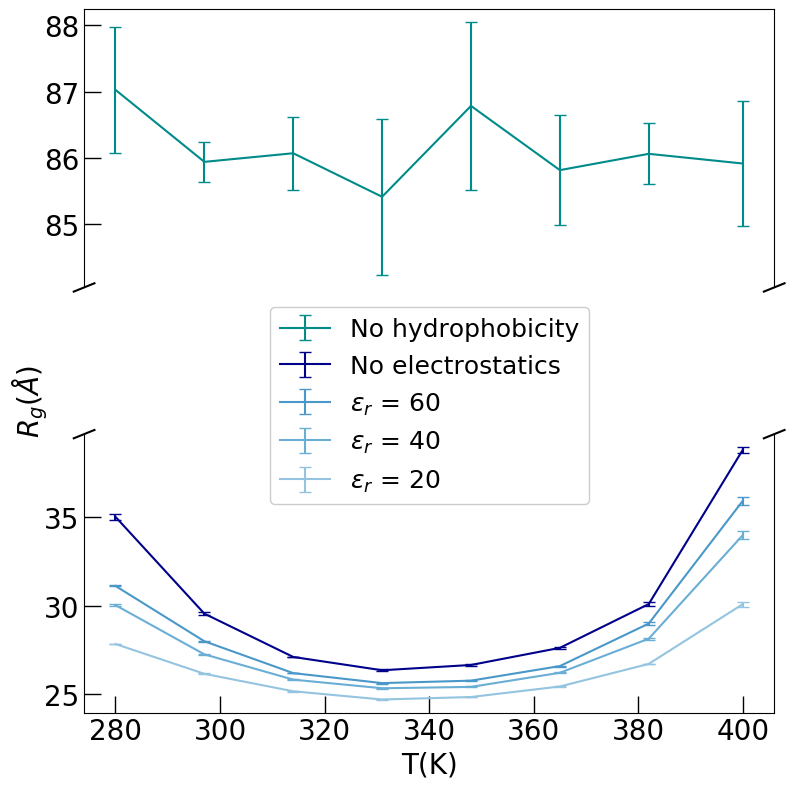

In [91]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,8))

cmap = plt.get_cmap('Blues')
colors = [0.6,0.5,0.4]

l0=ax.errorbar(nohydr.temperatures, nohydr.c_rg[0], yerr=nohydr.c_rg[1], label='No hydrophobicity', color='darkcyan')
l1=ax2.errorbar(noelec.temperatures, noelec.c_rg[0], yerr=noelec.c_rg[1], color=C_W, label='No electrostatics')
l2=ax2.errorbar(eps60.temperatures, eps60.c_rg[0], yerr=eps60.c_rg[1], color=cmap(colors[0]), label='$ε_r$ = 60')
l3=ax2.errorbar(eps40.temperatures, eps40.c_rg[0], yerr=eps40.c_rg[1], color=cmap(colors[1]), label='$ε_r$ = 40')
l4=ax2.errorbar(eps20.temperatures, eps20.c_rg[0], yerr=eps20.c_rg[1], color=cmap(colors[2]), label='$ε_r$ = 20')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(top=False)
ax2.xaxis.tick_bottom()
d = .015  
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  
ax2.set_xlabel("T(K)")
ax2.set_ylabel("$R_g (\AA)$")
ax2.yaxis.set_label_coords(-0.05, +1.12)

ax2.legend([l0, l1, l2, l3, l4], ["No hydrophobicity", "No electrostatics", "$ε_r$ = 60", "$ε_r$ = 40", "$ε_r$ = 20"],
          loc='upper center',
          bbox_to_anchor=(0.5,1.5))
plt.tight_layout()